In [1]:
import os
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_context('paper', font_scale=1.1)
import pandas as pd
import warnings
from scipy import stats
import sys

warnings.filterwarnings('ignore')
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from lapwise_corrrelation import GetData as gd

In [3]:
DirectoryName = '/Users/seetha/Box Sync/MultiDayData/Data/'
SaveFigureFolder = '/Users/seetha/Box Sync/MultiDayData/MultiDayPaper/Figures/FigurepanelsPDF/PV_correlation/'

In [4]:
lc1 = gd(FolderName=DirectoryName, base_task='Task1')

NR34
CFC17
NR32
CFC16
CFC18


In [5]:
lc2 = gd(FolderName=DirectoryName, base_task='Task3')

NR34
CFC17
NR32
CFC16
CFC18


In [6]:
lc3 = gd(FolderName=DirectoryName, base_task='Task2')

NR34


KeyboardInterrupt: 

In [ ]:
lc4 = gd(FolderName=DirectoryName, base_task='Task4')

In [7]:
tasklist = ['Task1', 'Task2']
b1, l1 = lc1.plot_first_vs_lastlap(tasklist)

tasklist = ['Task3', 'Task4']
b2, l2 = lc2.plot_first_vs_lastlap(tasklist)

In [9]:
for n, d1 in enumerate([l1, l2]):
    m1 = np.mean(d1, 0)
    ci = stats.norm.interval(alpha=0.99, loc=np.mean(m1), scale=stats.sem(m1))
    print('Mean %0.3f, CI %0.3f' %(np.mean(m1) , np.mean(m1)-ci[0]))

Mean 0.591, CI 0.061
Mean 0.427, CI 0.051


In [14]:
t, p = scipy.stats.ttest_rel(np.mean(l1, 0), np.mean(l2, 0))
p

1.707307953558064e-05

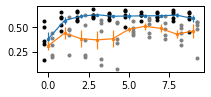

In [27]:
fs, ax = plt.subplots(1)
x = [-1, +1]
color = ['black', 'grey']
marker = ['o', 'o']
for n, (d1, d2) in enumerate(zip([b1, b2], [l1, l2])):
#     ax.errorbar(np.arange(0, 1), np.mean(d1), yerr=scipy.stats.sem(d1), marker='.')

    ax.errorbar(np.arange(0, np.size(d2, 1)), np.mean(d2, 0), yerr=scipy.stats.sem(d2, 0), marker='.')
    for i in range(10):
        ax.plot(np.ones_like([d2[:, i]]).squeeze()*i+(x[n]*0.25), d2[:, i], linewidth=0,
                marker=marker[n], markersize=3, color=color[n])
fs.set_size_inches((3, 1.2))
# fs.savefig(os.path.join(SaveFigureFolder, 'lap_correlation_withprevday.pdf'), bbox_inches='tight', dpi=300)

In [16]:
for i in range(10):
    t, p = scipy.stats.ttest_rel(l1[:, i], l2[:, i])
    print('lap %d, t=%0.3f, p=%0.3f, sig=%s' %(i, t, p, p<=0.05))

lap 0, t=0.895, p=0.422, sig=False
lap 1, t=2.728, p=0.053, sig=False
lap 2, t=2.773, p=0.050, sig=False
lap 3, t=2.819, p=0.048, sig=True
lap 4, t=2.396, p=0.075, sig=False
lap 5, t=5.953, p=0.004, sig=True
lap 6, t=4.125, p=0.015, sig=True
lap 7, t=2.991, p=0.040, sig=True
lap 8, t=3.522, p=0.024, sig=True
lap 9, t=3.349, p=0.029, sig=True


In [21]:
l2

array([[0.21808467, 0.4185723 , 0.36506454, 0.10839027, 0.07367307,
        0.42596379, 0.44720873, 0.54938539, 0.49363116, 0.52802768],
       [0.44095755, 0.61133622, 0.62818765, 0.573106  , 0.55079804,
        0.56943492, 0.60059675, 0.61437567, 0.31657314, 0.55410561],
       [0.31628735, 0.47367044, 0.19226115, 0.17039593, 0.34222396,
        0.44549325, 0.39764567, 0.42399975, 0.44414411, 0.18708237],
       [0.19549635, 0.21634598, 0.21836745, 0.46089128, 0.55903139,
        0.46454643, 0.53805035, 0.48389768, 0.52847683, 0.48298278],
       [0.3923726 , 0.48290091, 0.52257446, 0.54298805, 0.38477329,
        0.49075716, 0.57801199, 0.38395753, 0.36740417, 0.55957956]])

0.6087542589328011

## With rereward

In [52]:
tasklist = ['Task2', 'Task5']
b1, l1 = lc3.plot_first_vs_lastlap(tasklist)

tasklist = ['Task4', 'Task5']
b2, l2 = lc4.plot_first_vs_lastlap(tasklist)

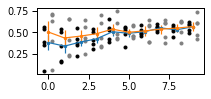

In [53]:
fs, ax = plt.subplots(1)
x = [-1, +1]
color = ['black', 'grey']
marker = ['o', 'o']
for n, (d1, d2) in enumerate(zip([b1, b2], [l1, l2])):
#     ax.errorbar(np.arange(0, 1), np.mean(d1), yerr=scipy.stats.sem(d1), marker='.')
    ax.errorbar(np.arange(0, np.size(d2, 1)), np.mean(d2, 0), yerr=scipy.stats.sem(d2, 0), marker='.')
    for i in range(10):
        ax.plot(np.ones_like([d2[:, i]]).squeeze()*i+(x[n]*0.25), d2[:, i], linewidth=0,
                marker=marker[n], markersize=3, color=color[n])
fs.set_size_inches((3, 1.2))
# fs.savefig(os.path.join(SaveFigureFolder, 'lap_correlation_withprevday_rerewarded.pdf'), bbox_inches='tight', dpi=300)

In [60]:
np.mean(l2, 0)

array([0.50040781, 0.43185771, 0.45361912, 0.48136815, 0.53449639,
       0.49845054, 0.51387085, 0.53467318, 0.5465211 , 0.56469874])

In [54]:
for i in range(10):
    t, p = scipy.stats.ttest_rel(l2[:, i], l1[:, i])
    print('lap %d, t=%0.3f, p=%0.3f, sig=%s' %(i, t, p, p<=0.05))

lap 0, t=2.909, p=0.044, sig=True
lap 1, t=5.638, p=0.005, sig=True
lap 2, t=2.852, p=0.046, sig=True
lap 3, t=1.610, p=0.183, sig=False
lap 4, t=0.991, p=0.378, sig=False
lap 5, t=0.335, p=0.754, sig=False
lap 6, t=0.159, p=0.881, sig=False
lap 7, t=-0.355, p=0.740, sig=False
lap 8, t=0.392, p=0.715, sig=False
lap 9, t=0.081, p=0.939, sig=False
